# Benchmark of PYSCAL_GLASSVIEWER 

Pyscal_Glassviewer is a FORK of Pyscal, which is modified and improved for Metal Glass data post-processing tasks by Zihao Bai, Jilin University.
This Benchmark uses a POSCAR file from MD of Al melting process. In order to test the partial PDF module and SRO module, we label the atoms into Al1 and Al2. The properties is as following:

Box parameter:

    55.996 0.0 0.0
    0.0 56.923 0.0
    0.0 0.0 56.369
    
Atom Numbers:

    Al1 Al2
    10000 976 


## Initialization

In [5]:
import pyscal as pc
import os
import pyscal.traj_process as ptp
import matplotlib.pyplot as plt
import numpy as np
import string
from scipy.io import savemat
import pickle

## Read Files

In [6]:
#def calculate_q(file, format="lammps-dump"):
file='POSCAR_Al1_Al2'
format="poscar"
sys1 = pc.System()
sys1.read_inputfile(file, format=format)#format{'lammps-dump', 'poscar', 'ase', 'mdtraj'}
sys1.find_neighbors(method="voronoi")
#sys1.calculate_q([2,4,5,6])
#q = sys.get_qvals([2,4,5,6])
#sys1.to_file('out',format='poscar')
#sys1.to_file('out'+file,customkeys=['aq2','aq4','aq5','aq6'])#aqn for average qn, qn for qn, other key name is the same with the attribute name, only lammps support custumkeys


## PDF-Total

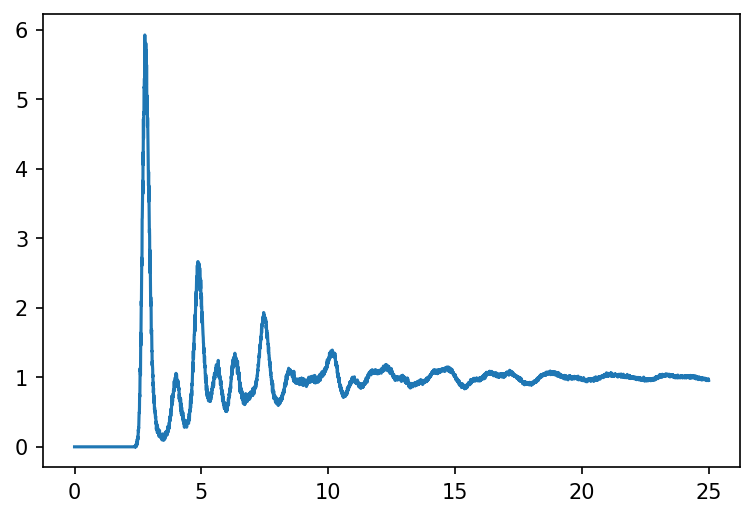

In [12]:

histnum=5000#直方图分割数量(密度)
pdf, r=sys1.calculate_pdf(histobins=histnum,histomin=0,cut=25)
plt.figure(dpi=150)
plt.plot(r,pdf);


## PDF-Partial

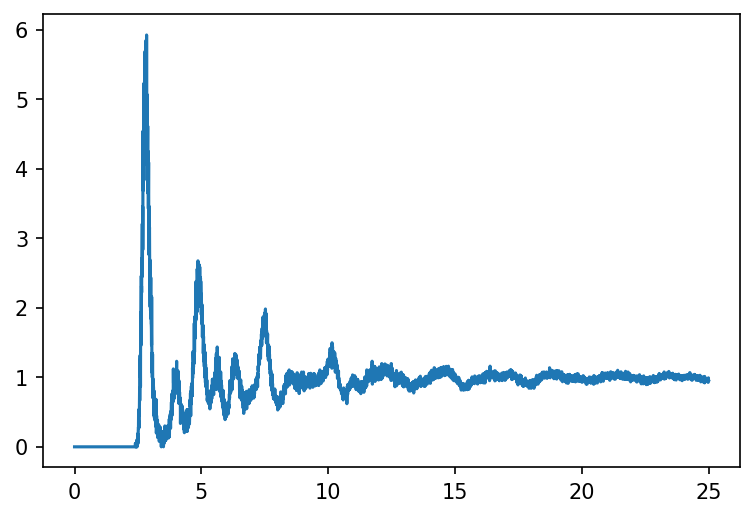

In [15]:
histnum=5000#直方图分割数量(密度)
pdfp, r=sys1.calculate_pdf(histobins=histnum,histomin=0,cut=25,partial=True,centertype=1,secondtype=2)
plt.figure(dpi=150)
plt.plot(r,pdfp);

## Bond Angle Distribution

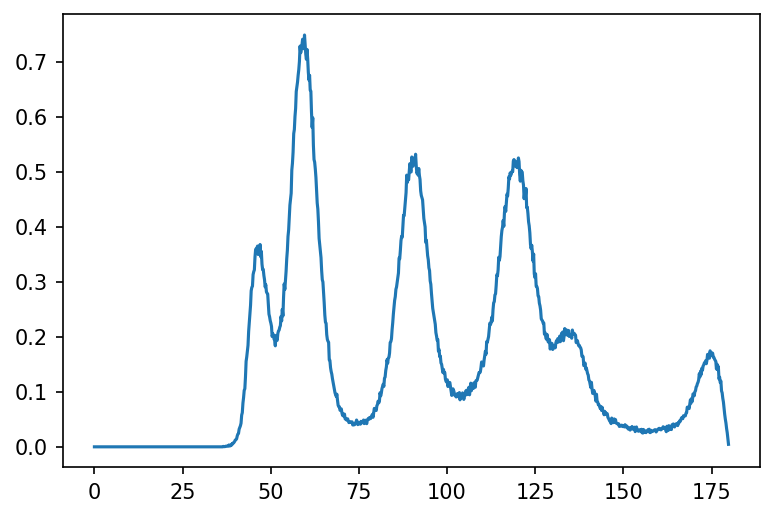

In [18]:
bad, r2=sys1.calculate_bad(histobins=1000,histomin=0,histomax=np.pi);
plt.figure(dpi=150)
plt.plot(r2*180/np.pi,bad);

## Structure Factor-FFT Method

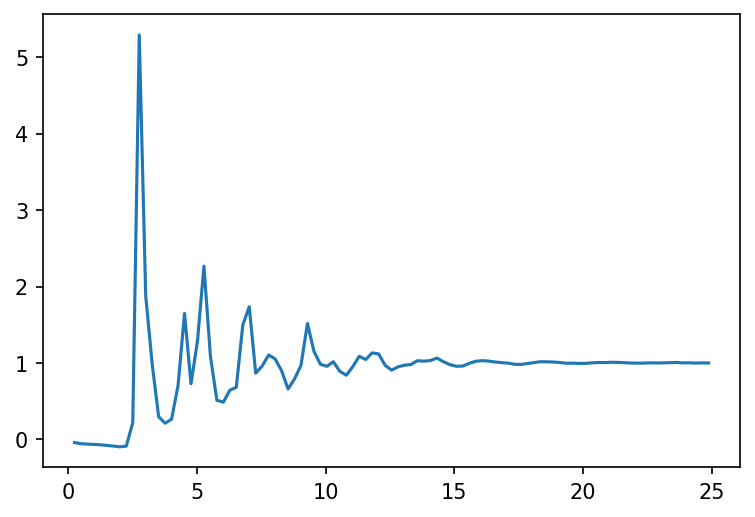

In [19]:
sf,q=sys1.calculate_sf(pdf, r,0);
plt.figure(dpi=150)
plt.plot(q[0:int(len(q)/20/histnum*2000)],sf[0:int(len(sf)/20/histnum*2000)]);


## Structure Factor-Integration Method

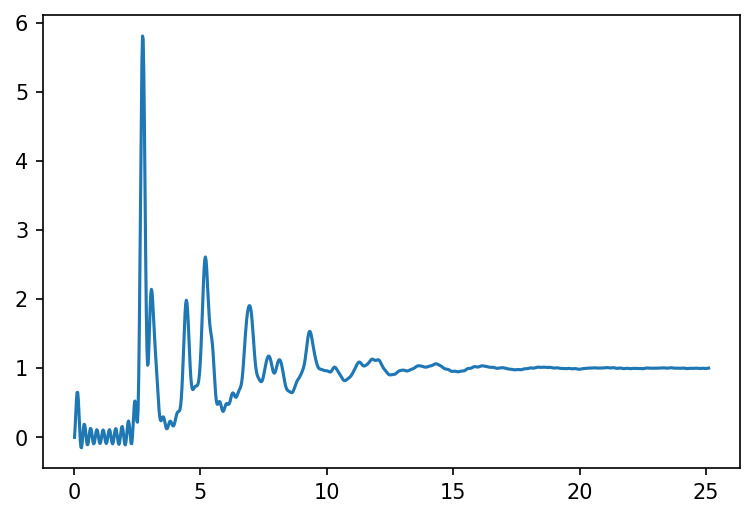

In [21]:
sf,q=sys1.calculate_sf(pdf, r,10);
plt.figure(dpi=150)
plt.plot(q[0:int(len(q)/20/histnum*2000)],sf[0:int(len(sf)/20/histnum*2000)]);

## SRO-Cowley

In [8]:
SRO_Cowley=sys1.calculate_pmsro(reference_type=1,compare_type=2)
print('The Cowley SRO is '+str(SRO_Cowley[0]))

The Cowley SRO is 0.0393368970897108


## SRO-Cargill-Spaepen

In [9]:
SRO_CS_unnorm=sys1.calculate_pmsro_CS(reference_type=1,compare_type=2,normalization=False)
SRO_CS_norm=sys1.calculate_pmsro_CS(reference_type=1,compare_type=2,normalization=True)
print('The Cowley SRO (unnormalized) is '+str(SRO_CS_unnorm))
print('The Cowley SRO (nnormalized)  is '+str(SRO_CS_norm))


The Cowley SRO (unnormalized) is -0.03794064956327503
The Cowley SRO (nnormalized)  is -0.3892886598620064


## CNA

In [24]:
CNA=sys1.calculate_cna()
print('CNA statistics of the system is '+str(CNA))
print('the structure number of atom0 is: '+str(sys1.atoms[0].structure))

CNA: {'others': 10976, 'fcc': 0, 'hcp': 0, 'bcc': 0, 'ico': 0}
the structure number of atom0 is: 0


## Voronoi Structure Identification

In [26]:
sys1.calculate_vorovector()
print('the vorovector (n3, n4, n5, n6) for Atom 0 is '+str(sys1.atoms[0].vorovector))

the vorovector (n3, n4, n5, n6) for Atom 0 is [0, 14, 0, 0]


## BOO

In [12]:
sys1.calculate_q([2,4,5,6])
BOO=sys1.get_qvals([2,4,5,6])
print('the BOO number (q2, q4, q5, q6) for Atom 0 is '+str(BOO[0][0])+' '+str(BOO[0][1])+' '+str(BOO[0][2])+' '+str(BOO[0][3]))

the BOO number (q2, q4, q5, q6) for Atom 0 is 0.09328374905692187 0.06986055915482668 0.10704426180048338 0.07135551396271009


# Visualization tool

This is a interactive tool which can only be used in Jupyter Notebook environment, and cannot be seen here.

In [13]:
sys1.show()

interactive(children=(FloatSlider(value=1.0, description='radius', max=30.0, min=1.0, step=1.0), Text(value='S…